In [958]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter

In [959]:
data = pd.read_csv('Spectrum_ground_truth_v1')

In [960]:
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

In [961]:
data = data.loc[data['350'].notnull(), :]

In [962]:
trait = 'CHL'

In [963]:
df = data.loc[data[trait].notnull(), :]

In [964]:
df

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
676,2077,11.30,544.30,74.867257,191.654930,270.533333,231.1,245.6,334.9,2.84,...,0.058713,0.058652,0.058671,0.058283,0.058007,0.057771,0.057392,0.057153,0.056950,0.056720
681,2082,12.20,519.60,72.868852,156.978852,429.566667,356.4,407.1,525.2,3.31,...,0.057279,0.057182,0.056898,0.056692,0.056399,0.055908,0.055721,0.055556,0.055149,0.055008
688,2089,9.60,452.90,73.333333,176.914062,313.833333,236.4,323.5,381.6,2.56,...,0.059233,0.059259,0.059080,0.058695,0.058077,0.057632,0.057429,0.057330,0.057374,0.057111
689,2090,8.20,358.60,74.634146,172.403846,349.300000,283.4,416.5,348.0,2.08,...,0.043723,0.043521,0.043374,0.043163,0.043037,0.042907,0.042835,0.042741,0.042520,0.042414
695,2096,8.50,436.70,76.823529,221.675127,255.333333,174.0,287.8,304.2,1.97,...,0.054449,0.054027,0.053832,0.053623,0.053350,0.053175,0.052921,0.052780,0.052907,0.053161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,4587,14.96,628.00,72.526738,152.798054,552.066667,493.6,585.4,577.2,4.11,...,0.047897,0.047782,0.047766,0.047935,0.047922,0.047873,0.047877,0.047550,0.047167,0.046907
2388,4589,11.62,525.80,74.268503,175.852843,457.700000,377.0,478.6,517.5,2.99,...,0.044129,0.043988,0.043800,0.043439,0.043239,0.043229,0.043340,0.043594,0.043514,0.043296
2389,4590,12.32,503.80,72.077922,146.453488,483.700000,382.4,508.5,560.2,3.44,...,0.053184,0.053091,0.052986,0.052769,0.052454,0.052359,0.052218,0.052067,0.051874,0.051651
2390,4591,11.17,505.87,72.873769,166.953795,521.533333,465.5,541.6,557.5,3.03,...,0.054906,0.054912,0.054887,0.054571,0.054200,0.053860,0.053767,0.053851,0.053684,0.053643


In [965]:
#Identify x 
position_350 = df.columns.get_loc('350')
position_2500 = df.columns.get_loc('2500') + 1 
X = df.iloc[:, position_350 : position_2500]

In [966]:
#Extracting the column names
col_names=X.columns

In [967]:
#applying savitzky golay
X = savgol_filter(X, window_length=5 , polyorder = 2)
X = pd.DataFrame(X, columns=col_names)

In [968]:
#drop first 100 column
X = X.drop(X.columns[0:100], axis=1)

In [969]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [970]:
# Choose from the X based on filtering array
X = X.iloc[: , column_filter]

In [971]:
# PLOT ID column was added again for merging 
X.insert(0, 'PLOT ID', np.array(df['PLOT ID']))

In [972]:
first_columns = df[['PLOT ID', 'Fresh_weight', 'Leaf_area', 'LWC', 'SLA', 'CHL', 'CHL1',
       'CHL2', 'CHL3', 'Dry_weight', 'rows', 'ranges', 'Block', 'Rep', 'Trt',
       'year', 'genotype', 'note', 'Calibration', 'ASD']]



In [973]:
#merging GEM gt
df=pd.merge(first_columns, X, how='outer')

In [974]:
df

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,2077,11.30,544.30,74.867257,191.654930,270.533333,231.1,245.6,334.9,2.84,...,0.072729,0.070272,0.067877,0.065537,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736
1,2082,12.20,519.60,72.868852,156.978852,429.566667,356.4,407.1,525.2,3.31,...,0.070413,0.068027,0.065486,0.063828,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973
2,2089,9.60,452.90,73.333333,176.914062,313.833333,236.4,323.5,381.6,2.56,...,0.073305,0.070533,0.068286,0.066110,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159
3,2090,8.20,358.60,74.634146,172.403846,349.300000,283.4,416.5,348.0,2.08,...,0.053787,0.051937,0.050193,0.048651,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396
4,2096,8.50,436.70,76.823529,221.675127,255.333333,174.0,287.8,304.2,1.97,...,0.068605,0.065904,0.063274,0.061591,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,4587,14.96,628.00,72.526738,152.798054,552.066667,493.6,585.4,577.2,4.11,...,0.057304,0.055618,0.054255,0.052254,0.051160,0.050028,0.048961,0.048075,0.047927,0.046863
213,4589,11.62,525.80,74.268503,175.852843,457.700000,377.0,478.6,517.5,2.99,...,0.053143,0.051391,0.050009,0.048248,0.047225,0.045835,0.045225,0.044159,0.043247,0.043314
214,4590,12.32,503.80,72.077922,146.453488,483.700000,382.4,508.5,560.2,3.44,...,0.065332,0.063273,0.061116,0.059545,0.057473,0.055754,0.054691,0.053247,0.052504,0.051653
215,4591,11.17,505.87,72.873769,166.953795,521.533333,465.5,541.6,557.5,3.03,...,0.065816,0.063957,0.062021,0.060217,0.058768,0.057140,0.056466,0.055024,0.054189,0.053637


In [975]:
brooke = pd.read_csv('Brooke_gt_merged')

In [976]:
brooke.rename(columns={'Dry weight': 'Dry_weight'},inplace=True)

In [977]:
data_all_v1 = pd.concat([df, brooke])

In [978]:
data_all_v1.reset_index(inplace=True, drop=True)

In [979]:
## Adding 18-20 data
M1820 = pd.read_csv('Maize18-20.csv' , dtype= {'Year' : 'category' , 'Genotpye' : 'object' , 'Conditions' : 'category' , 'crop' : 'category',
                                              'pheno' : 'category' , 'StalkLodgingPct' : 'object'})

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2166,2182,2188,2189) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [980]:
M1820.rename(columns = {'PlotID' : 'PLOT ID', 'Chlorophyll' : 'CHL', 'Leaf_Dry_Weight' : 'Dry_weight', 
                       'Leaf_Fresh_Weight': 'Fresh_weight', 'Leaf_Area' : 'Leaf_area', 'Specific_Leaf_Area': 'SLA'
                       },inplace=True)

In [981]:
LWC = M1820['Leaf_Water_Content'] *100

In [982]:
M1820.insert(3, 'LWC', LWC)

# DIGER TARAFTA CALISAN KOD#

In [983]:
M1820_trait = M1820.loc[M1820[trait].notnull(), :]

In [984]:
y= M1820_trait.loc[M1820_trait['Year'] != '2020', trait]

In [985]:
y

0       476.60
1       492.17
2       428.91
3       554.80
4       425.94
         ...  
1205    441.60
1206    460.70
1207    425.40
1208    452.40
1209    403.80
Name: CHL, Length: 1210, dtype: float64

In [986]:
# selecting the hyperspectral Data
X_total = M1820_trait.loc[M1820_trait.Year != '2020']
X_total =  X_total.iloc[: ,11:2162]


In [987]:
#remove the first 100
X_total.drop(columns = X_total.columns[0:100], inplace = True) 

In [988]:
sav_X = savgol_filter(X_total, window_length=5 , polyorder = 2)
sav_X.shape
df = pd.DataFrame(sav_X)
df.shape

(1210, 2051)

In [989]:
#Identify x 
position_350 = M1820.columns.get_loc('350')
position_2500 = M1820.columns.get_loc('2500') + 1 
X = M1820.iloc[:, position_350 : position_2500]

In [990]:
## Downsampling every 5 nm
column_filter = np.arange(0,2050,5)  ## creating an index for column filtering
X= df.iloc[:, column_filter] # selecting the filtered columns 

In [991]:
X

,0,5,10,15,20,25,30,35,40,45,...,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045
0,0.055697,0.056308,0.056915,0.056282,0.056266,0.056073,0.056486,0.056540,0.056949,0.057578,...,0.057044,0.055040,0.053502,0.051976,0.049967,0.048784,0.047596,0.046577,0.045197,0.044646
1,0.047062,0.047666,0.047747,0.047487,0.047766,0.046779,0.046745,0.046928,0.047551,0.047418,...,0.047882,0.046358,0.044865,0.043462,0.042257,0.041001,0.039954,0.038982,0.038187,0.037446
2,0.062530,0.063193,0.062680,0.062740,0.062249,0.062587,0.062033,0.062406,0.062671,0.062889,...,0.056217,0.054824,0.053451,0.051938,0.050669,0.049414,0.048448,0.047853,0.046589,0.046291
3,0.063028,0.063757,0.063248,0.063293,0.062883,0.062799,0.062553,0.062622,0.062960,0.063268,...,0.064278,0.062191,0.060239,0.058462,0.056742,0.055065,0.053999,0.052615,0.051718,0.051120
4,0.054530,0.054946,0.055045,0.055068,0.054493,0.054601,0.054903,0.054883,0.055037,0.056045,...,0.053655,0.051827,0.050021,0.048608,0.047107,0.045579,0.044420,0.043319,0.042522,0.041772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.057272,0.058190,0.057879,0.058228,0.057853,0.058498,0.058227,0.058802,0.059593,0.060809,...,0.064457,0.062125,0.060015,0.058034,0.056200,0.054787,0.053162,0.051628,0.050305,0.049649
1206,0.057040,0.057745,0.058330,0.058418,0.057895,0.058482,0.058230,0.058855,0.059583,0.061044,...,0.055797,0.053935,0.052303,0.050909,0.049426,0.048202,0.047013,0.045861,0.045102,0.044514
1207,0.053451,0.054180,0.054320,0.055093,0.054959,0.054680,0.054053,0.054917,0.055920,0.058343,...,0.054466,0.052688,0.050861,0.049238,0.047786,0.046560,0.045238,0.044029,0.043427,0.042548
1208,0.058446,0.060851,0.061359,0.060725,0.061255,0.060597,0.061148,0.061762,0.063008,0.065798,...,0.067403,0.065095,0.062842,0.060818,0.058809,0.057163,0.055674,0.054243,0.053074,0.052027


In [992]:
# split the dataset into training (60%) and testing (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.4) 

In [993]:
### calculate RMSE
pls = PLSRegression(n_components=20)
pls.fit(X_train, y_train)

PLSRegression(n_components=20)

In [994]:
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

25.74132539311373

In [995]:
y_pred = pls.predict(X_test)

<AxesSubplot:xlabel='CHL', ylabel='Predicted LWC values'>

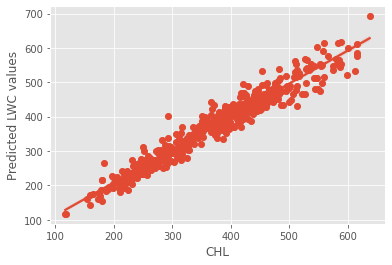

In [996]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted LWC values')
plt.xlabel('Ground truth LWC measurements')
sns.regplot(x = y_test , y = y_pred)

In [997]:
from scipy.stats import pearsonr, spearmanr
y_pred2 = [x[0] for x in y_pred]

r, p = spearmanr(y_test, y_pred2)
r2 = r**2
print(r2, p)

0.9468836651130239 2.248872547405327e-309


# diger tarafta calisan kod #

In [998]:
M1820_trait = M1820.loc[M1820[trait].notnull(), :]
M1820_trait = M1820_trait.loc[M1820_trait['Year'] != '2020', :]

In [999]:
#Identify x 
position_350 = M1820_trait.columns.get_loc('350')
position_2500 = M1820_trait.columns.get_loc('2500') + 1 
X = M1820_trait.iloc[:, position_350 : position_2500]


In [1000]:
X

,350,351,352,353,354,355,356,357,358,359,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.106430,0.098860,0.088910,0.077947,0.072843,0.093862,0.090015,0.070006,0.090431,0.084056,...,0.045184,0.045096,0.045050,0.044625,0.044355,0.044527,0.044399,0.043810,0.043605,0.043599
1,0.097093,0.103140,0.083749,0.066028,0.072148,0.087739,0.098567,0.092104,0.062686,0.095519,...,0.038003,0.037762,0.037672,0.037440,0.037419,0.037894,0.037886,0.037521,0.037509,0.037503
2,0.125163,0.124518,0.127662,0.127982,0.127173,0.115487,0.111536,0.112970,0.100015,0.079823,...,0.046410,0.046467,0.046406,0.046281,0.046181,0.046085,0.045880,0.045441,0.045417,0.045704
3,0.101250,0.094361,0.086309,0.090478,0.107267,0.088325,0.076786,0.083318,0.080874,0.084091,...,0.051306,0.051264,0.051125,0.051135,0.050983,0.050531,0.050280,0.050144,0.049989,0.049945
4,0.096988,0.106913,0.099666,0.085338,0.086283,0.086462,0.085748,0.084381,0.081730,0.073750,...,0.041867,0.042194,0.042013,0.041689,0.041549,0.040944,0.040854,0.041708,0.041670,0.041102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.018462,0.083275,0.100908,0.083378,0.110900,0.103183,0.094069,0.097444,0.099497,0.063413,...,0.049948,0.050165,0.050022,0.049576,0.049323,0.048908,0.048707,0.048788,0.048810,0.048986
1206,0.071978,0.093741,0.100782,0.093073,0.097581,0.097194,0.095029,0.092184,0.086068,0.069680,...,0.044395,0.044416,0.044305,0.044557,0.044560,0.044199,0.043961,0.043740,0.043638,0.043543
1207,0.129601,0.091998,0.087160,0.107831,0.105226,0.083397,0.081368,0.089573,0.062108,0.081436,...,0.042617,0.042558,0.042421,0.042585,0.042525,0.042152,0.041987,0.042005,0.041780,0.041325
1208,0.097422,0.024980,0.045219,0.109365,0.110137,0.075801,0.057043,0.070797,0.095715,0.079927,...,0.052669,0.052493,0.052295,0.052027,0.051711,0.051372,0.051050,0.050479,0.050353,0.050778


In [1001]:
#drop first 100 column
X.drop(columns = X.columns[0:100], inplace=True)


In [1002]:
#Extracting the column names
col_names=X.columns

In [1003]:
#applying savitzky golay
X = savgol_filter(X, window_length=5 , polyorder = 2)
X = pd.DataFrame(X, columns=col_names)

In [1004]:
#Create a np array for downsampling for every 5 nm
column_filter = np.arange(0, 2055, 5)

In [1005]:
# Choose from the X based on filtering array
X = X.iloc[: , column_filter]

In [1006]:
# PLOT ID column was added again for merging 
X.insert(0, 'PLOT ID', np.array(M1820_trait['PLOT ID']))

In [1007]:
X

,PLOT ID,450,455,460,465,470,475,480,485,490,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,0.056853,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,0.046982,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,0.062564,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,0.062985,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,0.055343,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,0.059975,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,0.060111,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,0.056307,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,0.063329,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [1008]:
trait_column = M1820_trait[['PLOT ID', trait]]

In [1009]:
#merging M1820 again
M1820=pd.merge(trait_column, X, how='outer')

In [1010]:
M1820

,PLOT ID,CHL,450,455,460,465,470,475,480,485,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,476.60,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,492.17,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,428.91,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,554.80,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,425.94,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,441.60,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,460.70,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,425.40,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,452.40,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [1011]:
data_all_v2 = pd.concat([data_all_v1, M1820])

In [1012]:
data_all_v2

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,2077,11.3,544.3,74.867257,191.654930,270.533333,231.1,245.6,334.9,2.84,...,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736,NaN,NaN,NaN,NaN
1,2082,12.2,519.6,72.868852,156.978852,429.566667,356.4,407.1,525.2,3.31,...,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973,NaN,NaN,NaN,NaN
2,2089,9.6,452.9,73.333333,176.914062,313.833333,236.4,323.5,381.6,2.56,...,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159,NaN,NaN,NaN,NaN
3,2090,8.2,358.6,74.634146,172.403846,349.300000,283.4,416.5,348.0,2.08,...,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396,NaN,NaN,NaN,NaN
4,2096,8.5,436.7,76.823529,221.675127,255.333333,174.0,287.8,304.2,1.97,...,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,NaN,NaN,NaN,NaN,441.600000,NaN,NaN,NaN,NaN,...,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991,NaN,NaN,NaN,NaN
1206,1268,NaN,NaN,NaN,NaN,460.700000,NaN,NaN,NaN,NaN,...,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547,NaN,NaN,NaN,NaN
1207,1269,NaN,NaN,NaN,NaN,425.400000,NaN,NaN,NaN,NaN,...,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360,NaN,NaN,NaN,NaN
1208,1270,NaN,NaN,NaN,NaN,452.400000,NaN,NaN,NaN,NaN,...,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706,NaN,NaN,NaN,NaN


In [1082]:
#chhosing the data (SAM, HIPS, 1820 and BGEM combination or only BGEM)
data_all = data_all_v1

In [1083]:
data_all = data_all.loc[data_all[trait].notnull(), :]

In [1084]:
data_all

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,2077,11.30,544.3,74.867257,191.654930,270.533333,231.1,245.6,334.9,2.84,...,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736,NaN,NaN,NaN,NaN
1,2082,12.20,519.6,72.868852,156.978852,429.566667,356.4,407.1,525.2,3.31,...,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973,NaN,NaN,NaN,NaN
2,2089,9.60,452.9,73.333333,176.914062,313.833333,236.4,323.5,381.6,2.56,...,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159,NaN,NaN,NaN,NaN
3,2090,8.20,358.6,74.634146,172.403846,349.300000,283.4,416.5,348.0,2.08,...,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396,NaN,NaN,NaN,NaN
4,2096,8.50,436.7,76.823529,221.675127,255.333333,174.0,287.8,304.2,1.97,...,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,6116,10.33,544.5,72.507260,191.725352,392.000000,325.4,438.5,412.1,2.84,...,0.084279,0.082632,0.081726,0.080514,0.078979,0.078064,271.0,2.0,WF9 x H95,HIPS
489,1157,7.73,365.7,73.738680,180.147783,321.600000,355.5,322.6,286.7,2.03,...,0.066089,0.065366,0.063772,0.063121,0.062455,0.061334,272.0,2.0,LH123HT@,SAM
498,6255,4.39,248.8,NaN,NaN,114.566667,87.6,135.7,120.4,NaN,...,0.134043,0.131491,0.129041,0.126676,0.124981,0.123236,281.0,2.0,LH123HT x 3IIH6,HIPS
499,6261,5.67,325.6,NaN,NaN,444.900000,304.2,525.9,504.6,NaN,...,0.101411,0.099513,0.097904,0.095859,0.094690,0.093403,282.0,2.0,B14A x Mo17,HIPS


In [1085]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.50 * IQR)
 upper_range = Q3 + (1.50 * IQR)
 return lower_range,upper_range

In [1086]:
outlier_treatment(data_all[trait])

(131.2666666666668, 579.6666666666666)

In [1087]:
lowerbound,upperbound = outlier_treatment(data_all[trait])

In [1088]:
rm_index =data_all[(data_all[trait] < lowerbound) | (data_all[trait] > upperbound)].index
rm_index.size

5

In [1089]:
data_all.drop(rm_index, axis=0 ,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [1090]:
#df= data_all.loc[data_all[trait].notnull(),:]
y = data_all.loc[:, trait]

In [1091]:
y

0      270.533333
1      429.566667
2      313.833333
3      349.300000
4      255.333333
          ...    
487    356.666667
488    392.000000
489    321.600000
499    444.900000
500    303.233333
Name: CHL, Length: 485, dtype: float64

In [1092]:
#Scale the y
#y= scale(y)

In [1093]:
position_450 = data_all.columns.get_loc('450')
position_2500 = data_all.columns.get_loc('2500') + 1 
X = data_all.iloc[:, position_450 : position_2500]

In [1094]:
X

,450,455,460,465,470,475,480,485,490,495,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,0.053303,0.055719,0.057250,0.058304,0.058684,0.058781,0.059279,0.060433,0.063244,0.067410,...,0.072729,0.070272,0.067877,0.065537,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736
1,0.046280,0.047698,0.048300,0.048775,0.049296,0.049253,0.049405,0.050353,0.051982,0.054699,...,0.070413,0.068027,0.065486,0.063828,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973
2,0.051248,0.053267,0.054210,0.054480,0.054979,0.054863,0.055218,0.056389,0.058087,0.061261,...,0.073305,0.070533,0.068286,0.066110,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159
3,0.038557,0.039987,0.040297,0.040451,0.040878,0.040878,0.041329,0.041966,0.043227,0.045072,...,0.053787,0.051937,0.050193,0.048651,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396
4,0.052874,0.055100,0.056064,0.056617,0.057121,0.057096,0.057706,0.058681,0.061111,0.064900,...,0.068605,0.065904,0.063274,0.061591,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.050395,0.051369,0.051471,0.051556,0.051739,0.051784,0.052039,0.052533,0.053297,0.054820,...,0.062484,0.060684,0.058972,0.057465,0.055541,0.054543,0.053583,0.052603,0.051692,0.051065
488,0.066723,0.067958,0.068309,0.068463,0.068465,0.068502,0.068561,0.068863,0.070051,0.072182,...,0.092813,0.090633,0.088661,0.086268,0.084279,0.082632,0.081726,0.080514,0.078979,0.078064
489,0.058527,0.059466,0.059698,0.059657,0.059730,0.059685,0.059820,0.060115,0.061046,0.062593,...,0.073851,0.072033,0.069996,0.068009,0.066089,0.065366,0.063772,0.063121,0.062455,0.061334
499,0.060475,0.061436,0.061868,0.062107,0.062182,0.062253,0.062386,0.062692,0.063855,0.065556,...,0.110756,0.109139,0.106557,0.103934,0.101411,0.099513,0.097904,0.095859,0.094690,0.093403


In [1095]:
# split the dataset into training (60%) and testing (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.4, random_state=1)

In [1096]:
#define the cv
cv = RepeatedKFold(n_splits=10, n_repeats=5)
mse = []

In [1097]:
#Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 60):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X_train, y_train, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(np.sqrt(score))
    n_comb = mse.index(min(mse)) +1

Text(0.5, 1.0, 'CHL')

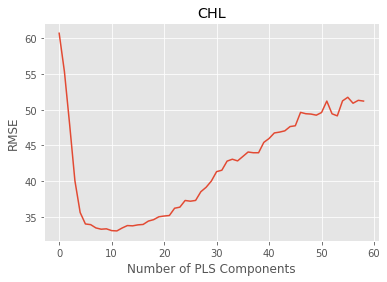

In [1098]:
#plot test RMSE vs. number of components
plt.style.use('ggplot')
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE')
plt.title(trait)

In [1099]:
### calculate RMSE
pls = PLSRegression(n_components=n_comb)
pls.fit(X_train, y_train)

PLSRegression(n_components=12)

In [1100]:
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))

29.951130482350784

In [1101]:
y_pred = pls.predict(X_test)

Text(150, 550, 'r$^2$ = 0.85')

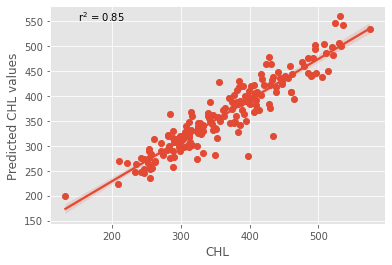

In [1115]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted' + ' ' + trait + ' ' + 'values')
plt.xlabel('Ground truth LWC measurements')
sns.regplot(x = y_test , y = y_pred)
plt.text(x=150 , y=550 , s='r$^2$ = 0.85'  )

In [1103]:
from scipy.stats import pearsonr, spearmanr
y_pred2 = [x[0] for x in y_pred]

r, p = spearmanr(y_test, y_pred2)
r2 = r**2
print(r2, p)

0.8518554688736877 1.5134651654316664e-81


In [1104]:
ytdf= pd.DataFrame(y_test)

In [1105]:
ytdf.reset_index(inplace=True)

In [1106]:
ypdf = pd.DataFrame(y_pred)

In [1107]:
ypdf.reset_index(inplace=True)

In [1108]:
merged =pd.concat([ytdf, ypdf], axis=1)

In [1109]:
diff = merged[trait]-merged[0]

In [1110]:
merged.insert(4, 'diff', diff)

In [1111]:
merged.sort_values(by='diff')[:50]

,index,CHL,index,0,diff
168,223,284.733333,168,363.999145,-79.265812
10,159,356.033333,10,427.074195,-71.040861
26,432,132.100000,26,199.804452,-67.704452
84,480,209.400000,84,269.612888,-60.212888
28,407,315.466667,28,367.609673,-52.143007
13,62,261.000000,13,312.656581,-51.656581
38,146,428.066667,38,477.671143,-49.604476
44,317,341.966667,44,387.464311,-45.497645
36,410,384.500000,36,428.920049,-44.420049
167,73,221.000000,167,265.164750,-44.164750


In [1112]:
M1820

,PLOT ID,CHL,450,455,460,465,470,475,480,485,...,2455,2460,2465,2470,2475,2480,2485,2490,2495,2500
0,1,476.60,0.055993,0.056322,0.056879,0.056425,0.056397,0.056072,0.056376,0.056658,...,0.054728,0.053201,0.051591,0.049702,0.048369,0.047261,0.046477,0.045248,0.044443,0.043548
1,2,492.17,0.047382,0.048127,0.047687,0.047716,0.047202,0.047071,0.046897,0.047100,...,0.045991,0.044575,0.043089,0.042055,0.040771,0.039858,0.038821,0.038129,0.037527,0.037481
2,3,428.91,0.062398,0.063536,0.062903,0.062879,0.062222,0.062713,0.061678,0.062325,...,0.054485,0.053088,0.051560,0.050420,0.049137,0.048187,0.047528,0.046476,0.046189,0.045660
3,4,554.80,0.063457,0.063583,0.063550,0.063454,0.063019,0.062917,0.062665,0.062473,...,0.061799,0.059871,0.058151,0.056560,0.054797,0.053684,0.052543,0.051463,0.050928,0.049942
4,5,425.94,0.054616,0.055025,0.055203,0.055006,0.054636,0.054771,0.054737,0.054916,...,0.051536,0.049742,0.048303,0.046935,0.045392,0.044128,0.043162,0.042092,0.041409,0.041218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,441.60,0.057219,0.058138,0.058779,0.057837,0.057801,0.058838,0.058261,0.058749,...,0.061812,0.059660,0.057641,0.055774,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991
1206,1268,460.70,0.057198,0.057884,0.058567,0.058332,0.058081,0.058744,0.058257,0.058976,...,0.053659,0.051965,0.050625,0.049163,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547
1207,1269,425.40,0.054172,0.054569,0.054368,0.055197,0.055280,0.055210,0.054157,0.055296,...,0.052351,0.050417,0.048966,0.047404,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360
1208,1270,452.40,0.058192,0.060730,0.061176,0.060620,0.060924,0.060902,0.061088,0.062168,...,0.064711,0.062493,0.060515,0.058571,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706


In [1113]:
data_all_v1

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,2077,11.30,544.3,74.867257,191.654930,270.533333,231.1,245.6,334.9,2.84,...,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736,NaN,NaN,NaN,NaN
1,2082,12.20,519.6,72.868852,156.978852,429.566667,356.4,407.1,525.2,3.31,...,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973,NaN,NaN,NaN,NaN
2,2089,9.60,452.9,73.333333,176.914062,313.833333,236.4,323.5,381.6,2.56,...,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159,NaN,NaN,NaN,NaN
3,2090,8.20,358.6,74.634146,172.403846,349.300000,283.4,416.5,348.0,2.08,...,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396,NaN,NaN,NaN,NaN
4,2096,8.50,436.7,76.823529,221.675127,255.333333,174.0,287.8,304.2,1.97,...,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,6137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,279.0,2.0,F42 x Mo17,HIPS
497,6137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,280.0,2.0,F42 x Mo17,HIPS
498,6255,4.39,248.8,NaN,NaN,114.566667,87.6,135.7,120.4,NaN,...,0.134043,0.131491,0.129041,0.126676,0.124981,0.123236,281.0,2.0,LH123HT x 3IIH6,HIPS
499,6261,5.67,325.6,NaN,NaN,444.900000,304.2,525.9,504.6,NaN,...,0.101411,0.099513,0.097904,0.095859,0.094690,0.093403,282.0,2.0,B14A x Mo17,HIPS


In [1114]:
data_all_v2

,PLOT ID,Fresh_weight,Leaf_area,LWC,SLA,CHL,CHL1,CHL2,CHL3,Dry_weight,...,2475,2480,2485,2490,2495,2500,Unnamed: 0,Growth_Stage,Genotype,Location
0,2077,11.3,544.3,74.867257,191.654930,270.533333,231.1,245.6,334.9,2.84,...,0.063610,0.062151,0.060620,0.058918,0.058016,0.056736,NaN,NaN,NaN,NaN
1,2082,12.2,519.6,72.868852,156.978852,429.566667,356.4,407.1,525.2,3.31,...,0.061803,0.060045,0.058654,0.057294,0.056347,0.054973,NaN,NaN,NaN,NaN
2,2089,9.6,452.9,73.333333,176.914062,313.833333,236.4,323.5,381.6,2.56,...,0.063953,0.062229,0.060127,0.059295,0.058106,0.057159,NaN,NaN,NaN,NaN
3,2090,8.2,358.6,74.634146,172.403846,349.300000,283.4,416.5,348.0,2.08,...,0.047140,0.045860,0.044532,0.043931,0.043024,0.042396,NaN,NaN,NaN,NaN
4,2096,8.5,436.7,76.823529,221.675127,255.333333,174.0,287.8,304.2,1.97,...,0.059520,0.057616,0.056196,0.054746,0.053379,0.053163,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1267,NaN,NaN,NaN,NaN,441.600000,NaN,NaN,NaN,NaN,...,0.054333,0.052808,0.051459,0.050078,0.049260,0.048991,NaN,NaN,NaN,NaN
1206,1268,NaN,NaN,NaN,NaN,460.700000,NaN,NaN,NaN,NaN,...,0.047941,0.046869,0.045788,0.044659,0.044509,0.043547,NaN,NaN,NaN,NaN
1207,1269,NaN,NaN,NaN,NaN,425.400000,NaN,NaN,NaN,NaN,...,0.046277,0.045036,0.043880,0.042958,0.042473,0.041360,NaN,NaN,NaN,NaN
1208,1270,NaN,NaN,NaN,NaN,452.400000,NaN,NaN,NaN,NaN,...,0.056781,0.055330,0.053909,0.052883,0.051710,0.050706,NaN,NaN,NaN,NaN
